In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sklearn

In [24]:
housing_data = pd.read_csv('Downloads/HousingData.csv')
print(housing_data.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87   NaN  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.6

In [25]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [53]:
housing_data = housing_data.dropna()
print(housing_data.head(10))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509    5  311   

    PTRATIO       B  LSTAT  MEDV  
0      15.3  396.90   4.98  24.0  
1      17.8  396.90   9.14  21.6  
2      17.8  392.83   4.03  34.7  
3      18.7  394.63   2.94  33.4  
5      18.7  394.12  

In [54]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


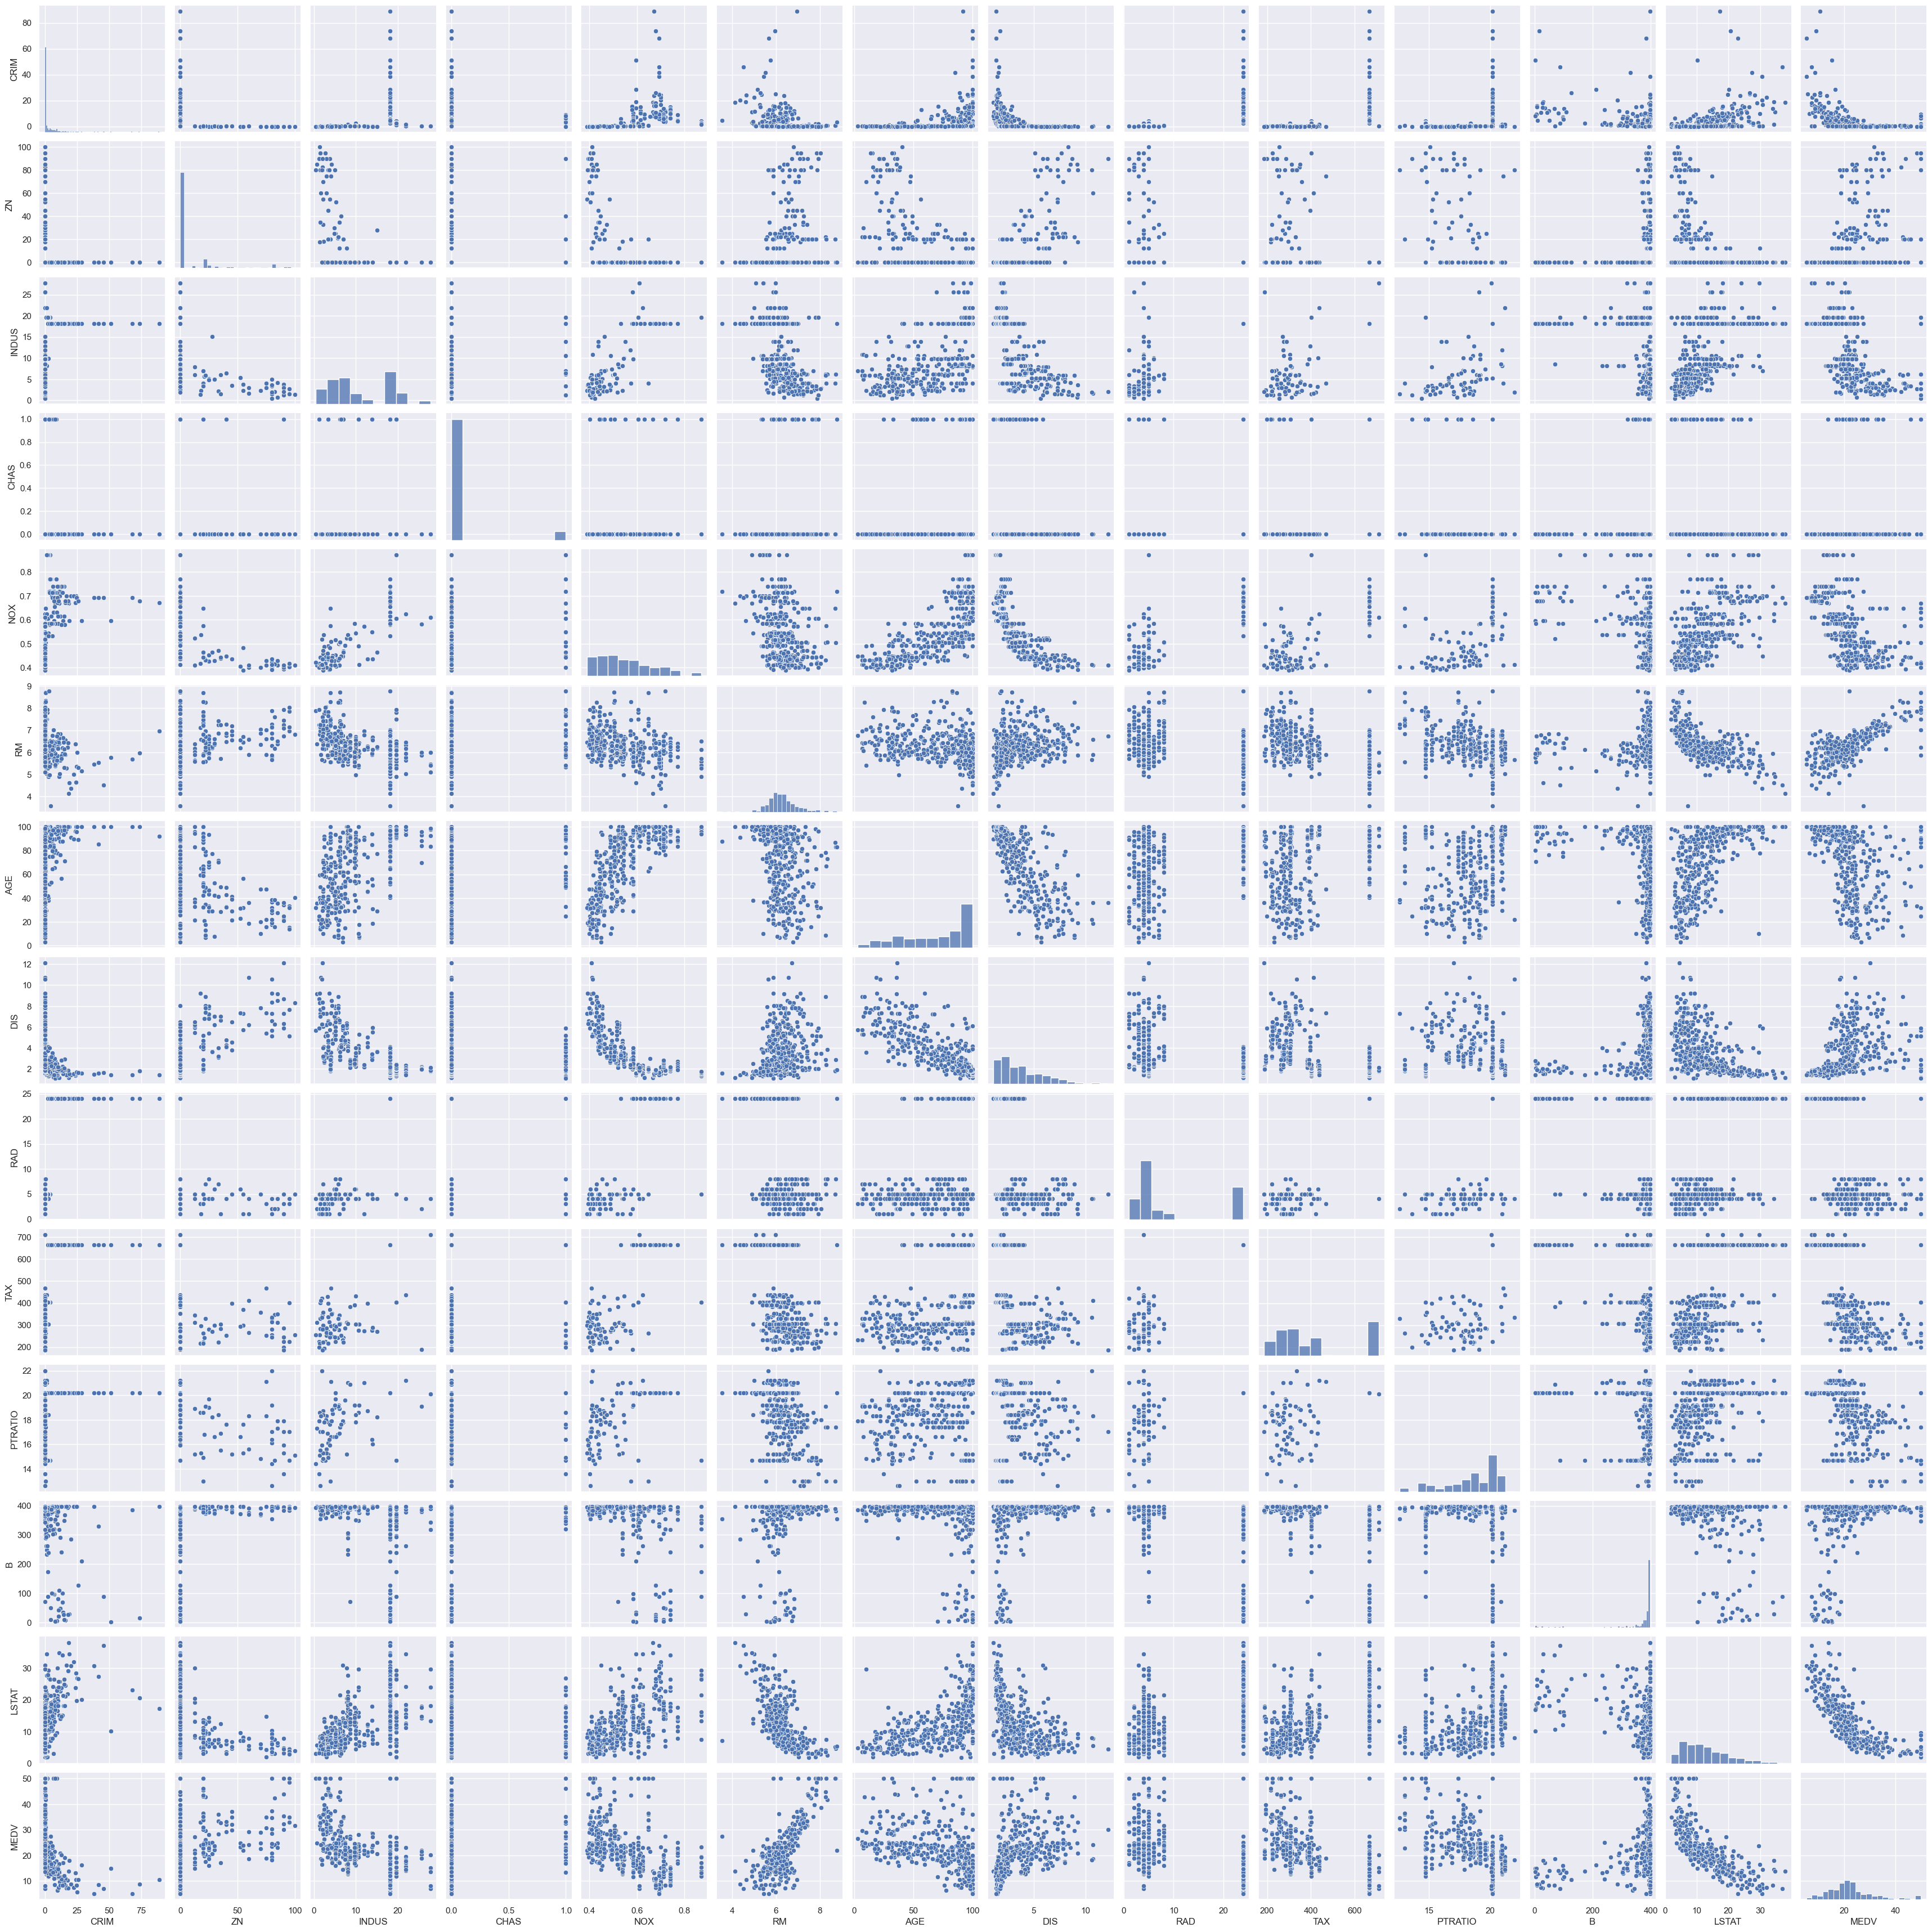

In [55]:
sns.pairplot(data=housing_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT','MEDV']])

<Axes: xlabel='CRIM', ylabel='MEDV'>

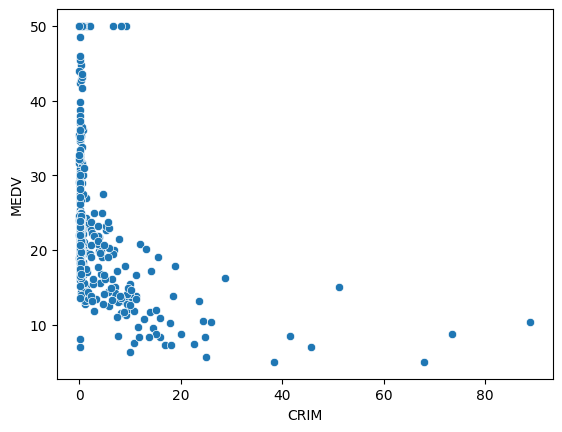

In [5]:
sns.scatterplot(data = housing_data, x = 'CRIM', y = 'MEDV')


In [7]:
X = housing_data.iloc[:, :-1].values
y = housing_data.iloc[:, -1].values
print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [4.5270e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 9.0800e+00]
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]]
[24.  21.6 34.7 33.4 28.7 27.1 16.5 15.  18.9 21.7 20.4 19.9 23.1 17.5
 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.  12.7 14.5
 13.2 13.1 13.5 21.  24.7 30.8 34.9 26.6 25.3 21.2 19.3 20.  14.4 19.4
 19.7 25.  18.9 35.4 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5
 19.4 22.  17.4 20.9 24.2 21.7 22.8 21.4 20.  20.8 21.2 28.  23.9 24.8
 22.9 23.9 26.6 22.5 23.6 28.7 22.6 22.  25.  20.6 28.4 21.4 38.7 43.8
 33.2 27.5 26.5 18.6 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8 18.8 18.7
 18.5 19.2 22.  20.3 20.5 18.8 21.4 16.2 18.  14.3 19.2 19.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_test)
print(y_test)

[[3.22640e-01 0.00000e+00 2.18900e+01 ... 2.12000e+01 3.78250e+02
  1.69000e+01]
 [4.54192e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.74560e+02
  7.79000e+00]
 [4.46200e-02 2.50000e+01 4.86000e+00 ... 1.90000e+01 3.95630e+02
  7.22000e+00]
 ...
 [1.01530e-01 0.00000e+00 1.28300e+01 ... 1.87000e+01 3.73660e+02
  1.19700e+01]
 [3.58400e-02 8.00000e+01 3.37000e+00 ... 1.61000e+01 3.96900e+02
  4.67000e+00]
 [1.68118e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  3.08100e+01]]
[17.4 25.  23.9 50.  14.2 19.5 28.6 14.1 23.3 12.8 33.  19.7 50.  22.
 13.5 29.  36.2 23.6 23.8 24.4 16.7 37.  20.9 20.6 12.5 21.2 19.1  5.
 22.7 20.8 27.5 22.  18.5 22.6 15.1 17.2 22.2 17.5 20.3 16.5 21.6 11.3
 25.  23.2 32.  15.4 18.  20.  21.9 14.3 24.3 20.4 12.7 35.4  8.8 10.2
 19.8 20.5 21.2 24.2 18.2 12.1 22.2 27.1 24.5 46.  15.  29.4 15.6 34.9
 21.  12.7 22.1 20.1 19.5 19.4 20.  23.5  7.2]


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16.19 17.4 ]
 [19.91 25.  ]
 [26.52 23.9 ]
 [41.55 50.  ]
 [16.38 14.2 ]
 [18.52 19.5 ]
 [29.2  28.6 ]
 [19.11 14.1 ]
 [28.34 23.3 ]
 [12.4  12.8 ]
 [24.1  33.  ]
 [14.3  19.7 ]
 [22.42 50.  ]
 [25.74 22.  ]
 [11.37 13.5 ]
 [32.29 29.  ]
 [27.29 36.2 ]
 [30.03 23.6 ]
 [25.55 23.8 ]
 [24.28 24.4 ]
 [18.33 16.7 ]
 [30.88 37.  ]
 [20.57 20.9 ]
 [18.53 20.6 ]
 [18.95 12.5 ]
 [23.16 21.2 ]
 [16.87 19.1 ]
 [ 9.71  5.  ]
 [23.59 22.7 ]
 [23.63 20.8 ]
 [ 7.38 27.5 ]
 [22.84 22.  ]
 [18.78 18.5 ]
 [26.79 22.6 ]
 [15.41 15.1 ]
 [13.78 17.2 ]
 [22.99 22.2 ]
 [17.74 17.5 ]
 [22.64 20.3 ]
 [13.22 16.5 ]
 [24.71 21.6 ]
 [12.7  11.3 ]
 [29.16 25.  ]
 [21.8  23.2 ]
 [33.14 32.  ]
 [14.59 15.4 ]
 [19.54 18.  ]
 [17.03 20.  ]
 [11.91 21.9 ]
 [14.23 14.3 ]
 [19.89 24.3 ]
 [18.69 20.4 ]
 [12.36 12.7 ]
 [31.79 35.4 ]
 [ 7.39  8.8 ]
 [17.1  10.2 ]
 [18.5  19.8 ]
 [18.99 20.5 ]
 [20.99 21.2 ]
 [26.31 24.2 ]
 [17.64 18.2 ]
 [18.12 12.1 ]
 [21.78 22.2 ]
 [19.91 27.1 ]
 [20.88 24.5 ]
 [40.73 46.  ]
 [19.98 15

In [19]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred))
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
print( "R-squared", r2_score(y_test,y_pred))
r2_score(y_test, y_pred)
print('Adjusted R-squared:', 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

MAE: 3.484356255630235
MSE: 28.849872777167
R-squared 0.5806563123015813
Adjusted R-squared: 0.4967875747618976


In [13]:
housing_data['MEDV'].describe()

count    394.000000
mean      22.359645
std        9.142979
min        5.000000
25%       16.800000
50%       21.050000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64